# Exploring The Tips DataSet
## Why This Project?
    1. learn data cleaning with pandas
    2. perform statistical calculations using NumPy (mean,median,etc)
    3. Visualize trends with Matplotlib and seaborn 
    4. Understand  the relationship between customer features 



#### Import Libraries


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"]=(8,5)


#### Load Data 

In [2]:
#load data set
import seaborn as sns
df=sns.load_dataset('tips')

# display 
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# Dataset info 
print("\n Data set info:",df.info())

#Summary statistics

print("Summary statistics:",df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB

 Data set info: None
Summary statistics:        total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


##### Insights
1. The Dataset has 244 rows and 7 main columns 
2. Columns are a mix of numeric and categorical 
3. No missing values by default but cleaning is done 

####
 Check and clean Missing data


In [4]:
# Check for missing values
print("Missing values before cleaning:\n", df.isnull().sum())

# Fill categorical NaN values with mode (if any)
for col in ['sex', 'day', 'time', 'smoker']:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values after cleaning:\n", df.isnull().sum())


Missing values before cleaning:
 total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Missing values after cleaning:
 total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


##### Insights:
The Tips dataset is already clean - no missing or inconsistent values
Demosntrates how to handle missing data if it existed


#### Statistical Analysis 


In [6]:
import numpy as np
mean_tip = np.mean(df['tip'])
median_tip = np.median(df['tip'])
std_tip = np.std(df['tip'])

print(f"Mean Tip: {mean_tip:.2f}")
print(f"Median Tip: {median_tip:.2f}")
print(f"Standard Deviation of Tip: {std_tip:.2f}")

Mean Tip: 3.00
Median Tip: 2.90
Standard Deviation of Tip: 1.38


##### Insights
Mean tip=~3.00
MEdian tip=~3.00
standard deviation=~1.00 ,meaning tips are moderately spread around the  mean


#### Visulaization 


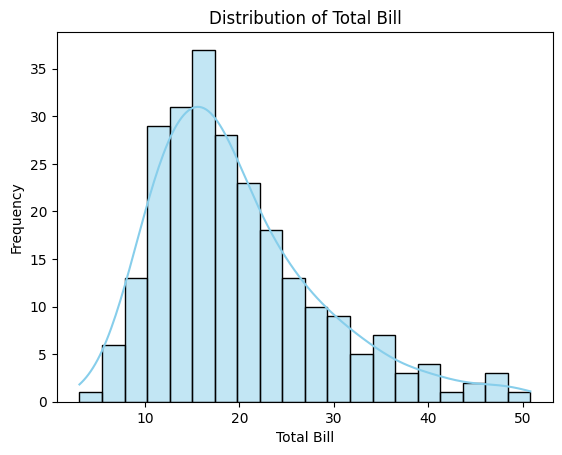

In [9]:
# Distribution of Total Bill
import matplotlib.pyplot as plt
sns.histplot(df['total_bill'],bins=20,kde=True,color='skyblue')
plt.title("Distribution of Total Bill")
plt.xlabel("Total Bill")
plt.ylabel("Frequency")
plt.show()

##### Insight:
1. Most bills are Between 10$ and 25$
2. Distribution is right skewed meaning a few high value bills exist


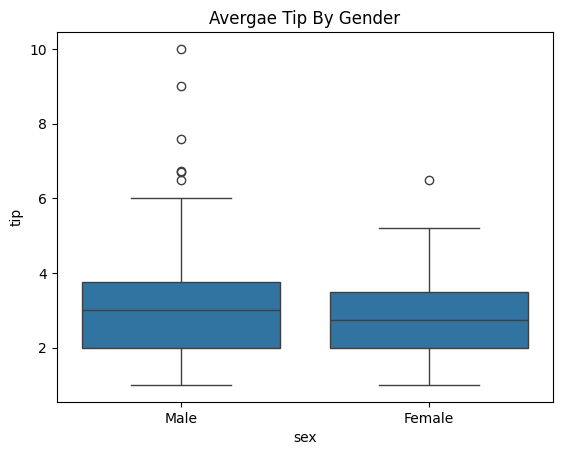

In [11]:
# Average Tip By Gender
sns.boxplot(x='sex',y='tip',data=df)
plt.title("Avergae Tip By Gender")
plt.show()

##### Insight:
1. Male Customers tend to give slightly higher absolute tips than female customers
2. This may be linked to largeer total bills rather than tipping generosity


,total_bill,tip,sex,smoker,day,time,size,tip_percent,group_size
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673,Small
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159,Small
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734,Small
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041,Small
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765,Large


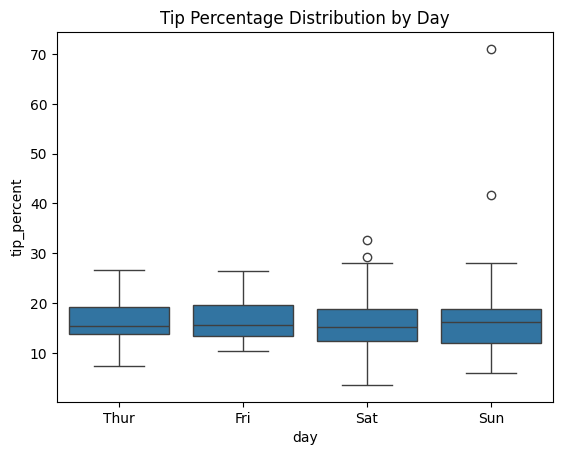

In [13]:
# Tip percentage by Day 
# Add a new feature: tip percentage
df['tip_percent'] = (df['tip'] / df['total_bill']) * 100

# Group size category
df['group_size'] = np.where(df['size'] > 3, 'Large', 'Small')

display(df.head())

sns.boxplot(x='day',y='tip_percent',data=df)
plt.title("Tip Percentage Distribution by Day")
plt.show()

##### Insights
1. Sunday and satruday have slightly higher tip percentages mindication more generous tipping on weekends
2. Weekdays show tighter variaio 

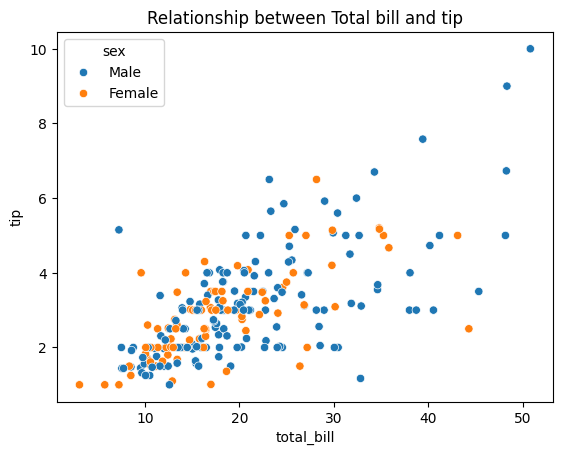

In [14]:
# Total Bill VS Tip
sns.scatterplot(x='total_bill', y='tip', hue='sex',data=df)
plt.title("Relationship between Total bill and tip")
plt.show()

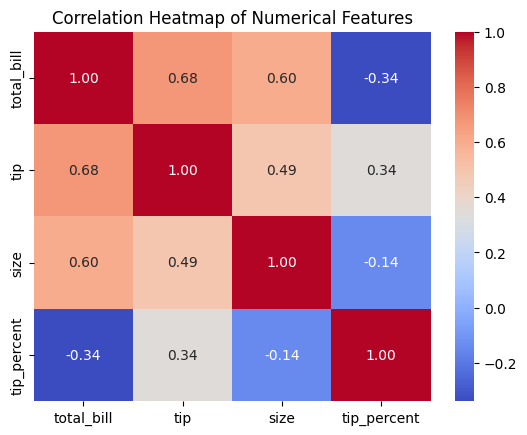

In [15]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


##### Insight
Tip and total_bill are strongly correlated (0.68).

Size also has a small positive relationship with bill and tip values.

Tip percentage is slightly negatively correlated with total bill (larger bills → lower percentage tips).

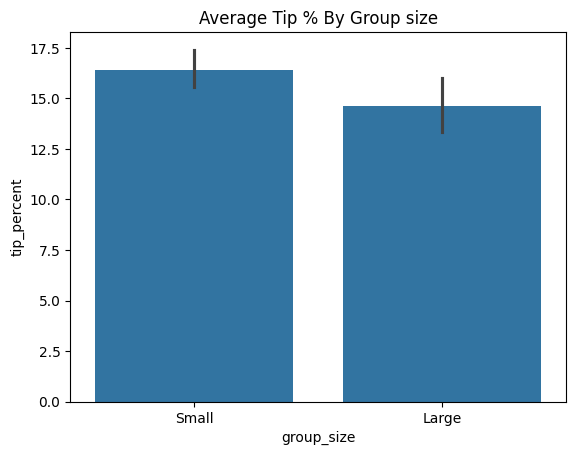

In [16]:
#Tips by group Size
sns.barplot(x='group_size',y='tip_percent',data=df)
plt.title("Average Tip % By Group size")
plt.show()

##### Insight
1. Smaller group tend to tip slightly higher percentages,possibly due to easier bill splitting or personal attention from servers


##### Overall Insights Summary
1. Data Quality:	Dataset is clean — no missing values or duplicates.
2. Spending Pattern:	Most total bills range between $10–$25.
3. Gender Trend:	Men give slightly higher absolute tips than women.
4. Day Tren: Weekend diners (Sat/Sun) tend to tip more generously.
5. Correlation:Strong relationship between total_bill and tip.
6. Tip % vs Bill:	Larger total bills often result in smaller tip percentages.
7. Group Size Effect:	Smaller groups usually leave a higher percentage tip.